In [1]:
import math
import matplotlib.pyplot as plt

SR_PC = []
SR_EK=[]
TAU=[]

In [31]:
"""Исходные данные"""
m = 0.01 # в киллограммах
l = 0.1 # в метрах
g = 9.81 # м/c
tau = 0.0001 #с (тау)
N = int(1/tau) #количество измерений (по тау)

TAU.append(tau)

In [32]:
"""Начальные условия"""
x_0 = 2
v_0 = 0

In [33]:
def energy(x,v):
    return m*(l**2)*((v**2)/2 + g*(1-math.cos(x))/l)

def func(x):
    return -g*math.sin(x)/l

def draw(X,Y):
    plt.xlabel("t") 
    plt.ylabel("E(t)")
    plt.grid()
    plt.minorticks_on()
    #plt.grid(which='minor',color = 'black', linestyle = ':')
    plt.plot(X,Y)
    
time=[]
method=[]


### метод Эйлера

max E=0.04181732947810987, min E=0.0416772013995824


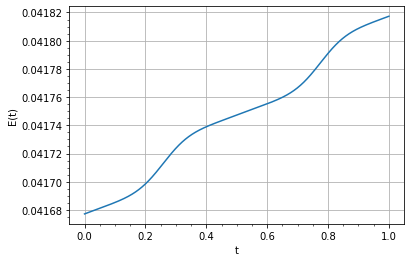

In [5]:
'''
V = [v_0]
X = [x_0]
T = [0]
E = [energy(x_0,v_0)]
for i in range(N):
    v = V[-1]
    x = X[-1]
    t = T[-1]
    V.append(v + tau * func(x))
    X.append(x + tau * v)
    T.append(t + tau)
    E.append(energy(X[-1],V[-1]))
draw(T,E)
time.append(T)
method.append(E)
print('max E={}, min E={}'.format(max(E),min(E)))
'''

### метод Эйлера-Кромера

max E=0.013898112130211903, min E=0.013886691398999267


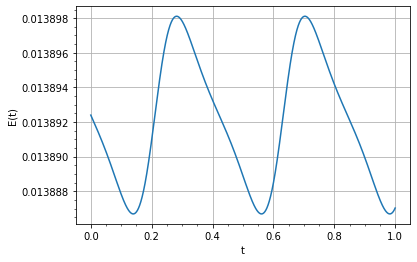

In [34]:
V = [v_0]
X = [x_0]
T = [0]
E = [energy(x_0,v_0)]
for i in range(N):
    v = V[-1]
    x = X[-1]
    t = T[-1]
    V.append(v + tau * func(x))
    X.append(x + tau * V[-1])
    T.append(t + tau)
    E.append(energy(X[-1],V[-1]))
draw(T,E)
time.append(T)
method.append(E)
print('max E={}, min E={}'.format(max(E),min(E)))
SR_EK.append(max(E)-((min(E)+max(E))/2))

# метод "предиктор-корректор"

max E=0.013892400478531132, min E=0.013892398861197662,среднее значение=0.013892399669864396


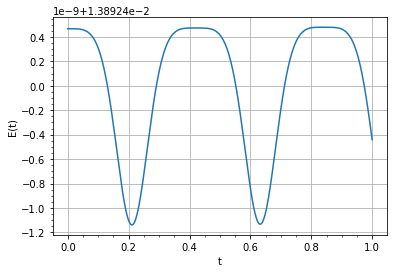

In [35]:
V = [v_0]
X = [x_0]
T = [0]
E = [energy(x_0,v_0)]
for i in range(N):
    v = V[-1]
    x = X[-1]
    t = T[-1]
    v_= v + tau * func(x)
    x_= x + tau * v
    V.append(v + tau * (func(x) + func(x_)) / 2)
    X.append(x + tau * (v + v_) / 2)
    T.append(t + tau)
    E.append(energy(X[-1],V[-1]))
draw(T,E)
time.append(T)
method.append(E)
print('max E={}, min E={},среднее значение={}'.format(max(E),min(E),(min(E)+max(E))/2))
SR_PC.append(max(E)-((min(E)+max(E))/2))

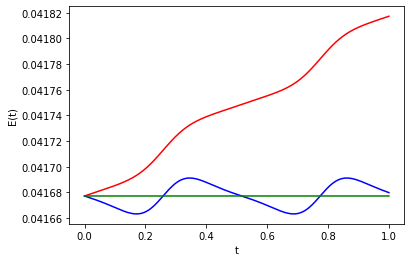

In [8]:
plt.xlabel("t") 
plt.ylabel("E(t)")

plt.plot(time[0],method[0],color = 'r') #Эйлера - красный
plt.plot(time[1],method[1],color = 'b') #Эйлера-Кромера - синий
plt.plot(time[2],method[2],color = 'g') #Предиктор-корректор - зеленый

[0.0001] [8.086667360046595e-10] [5.710365606316839e-06]


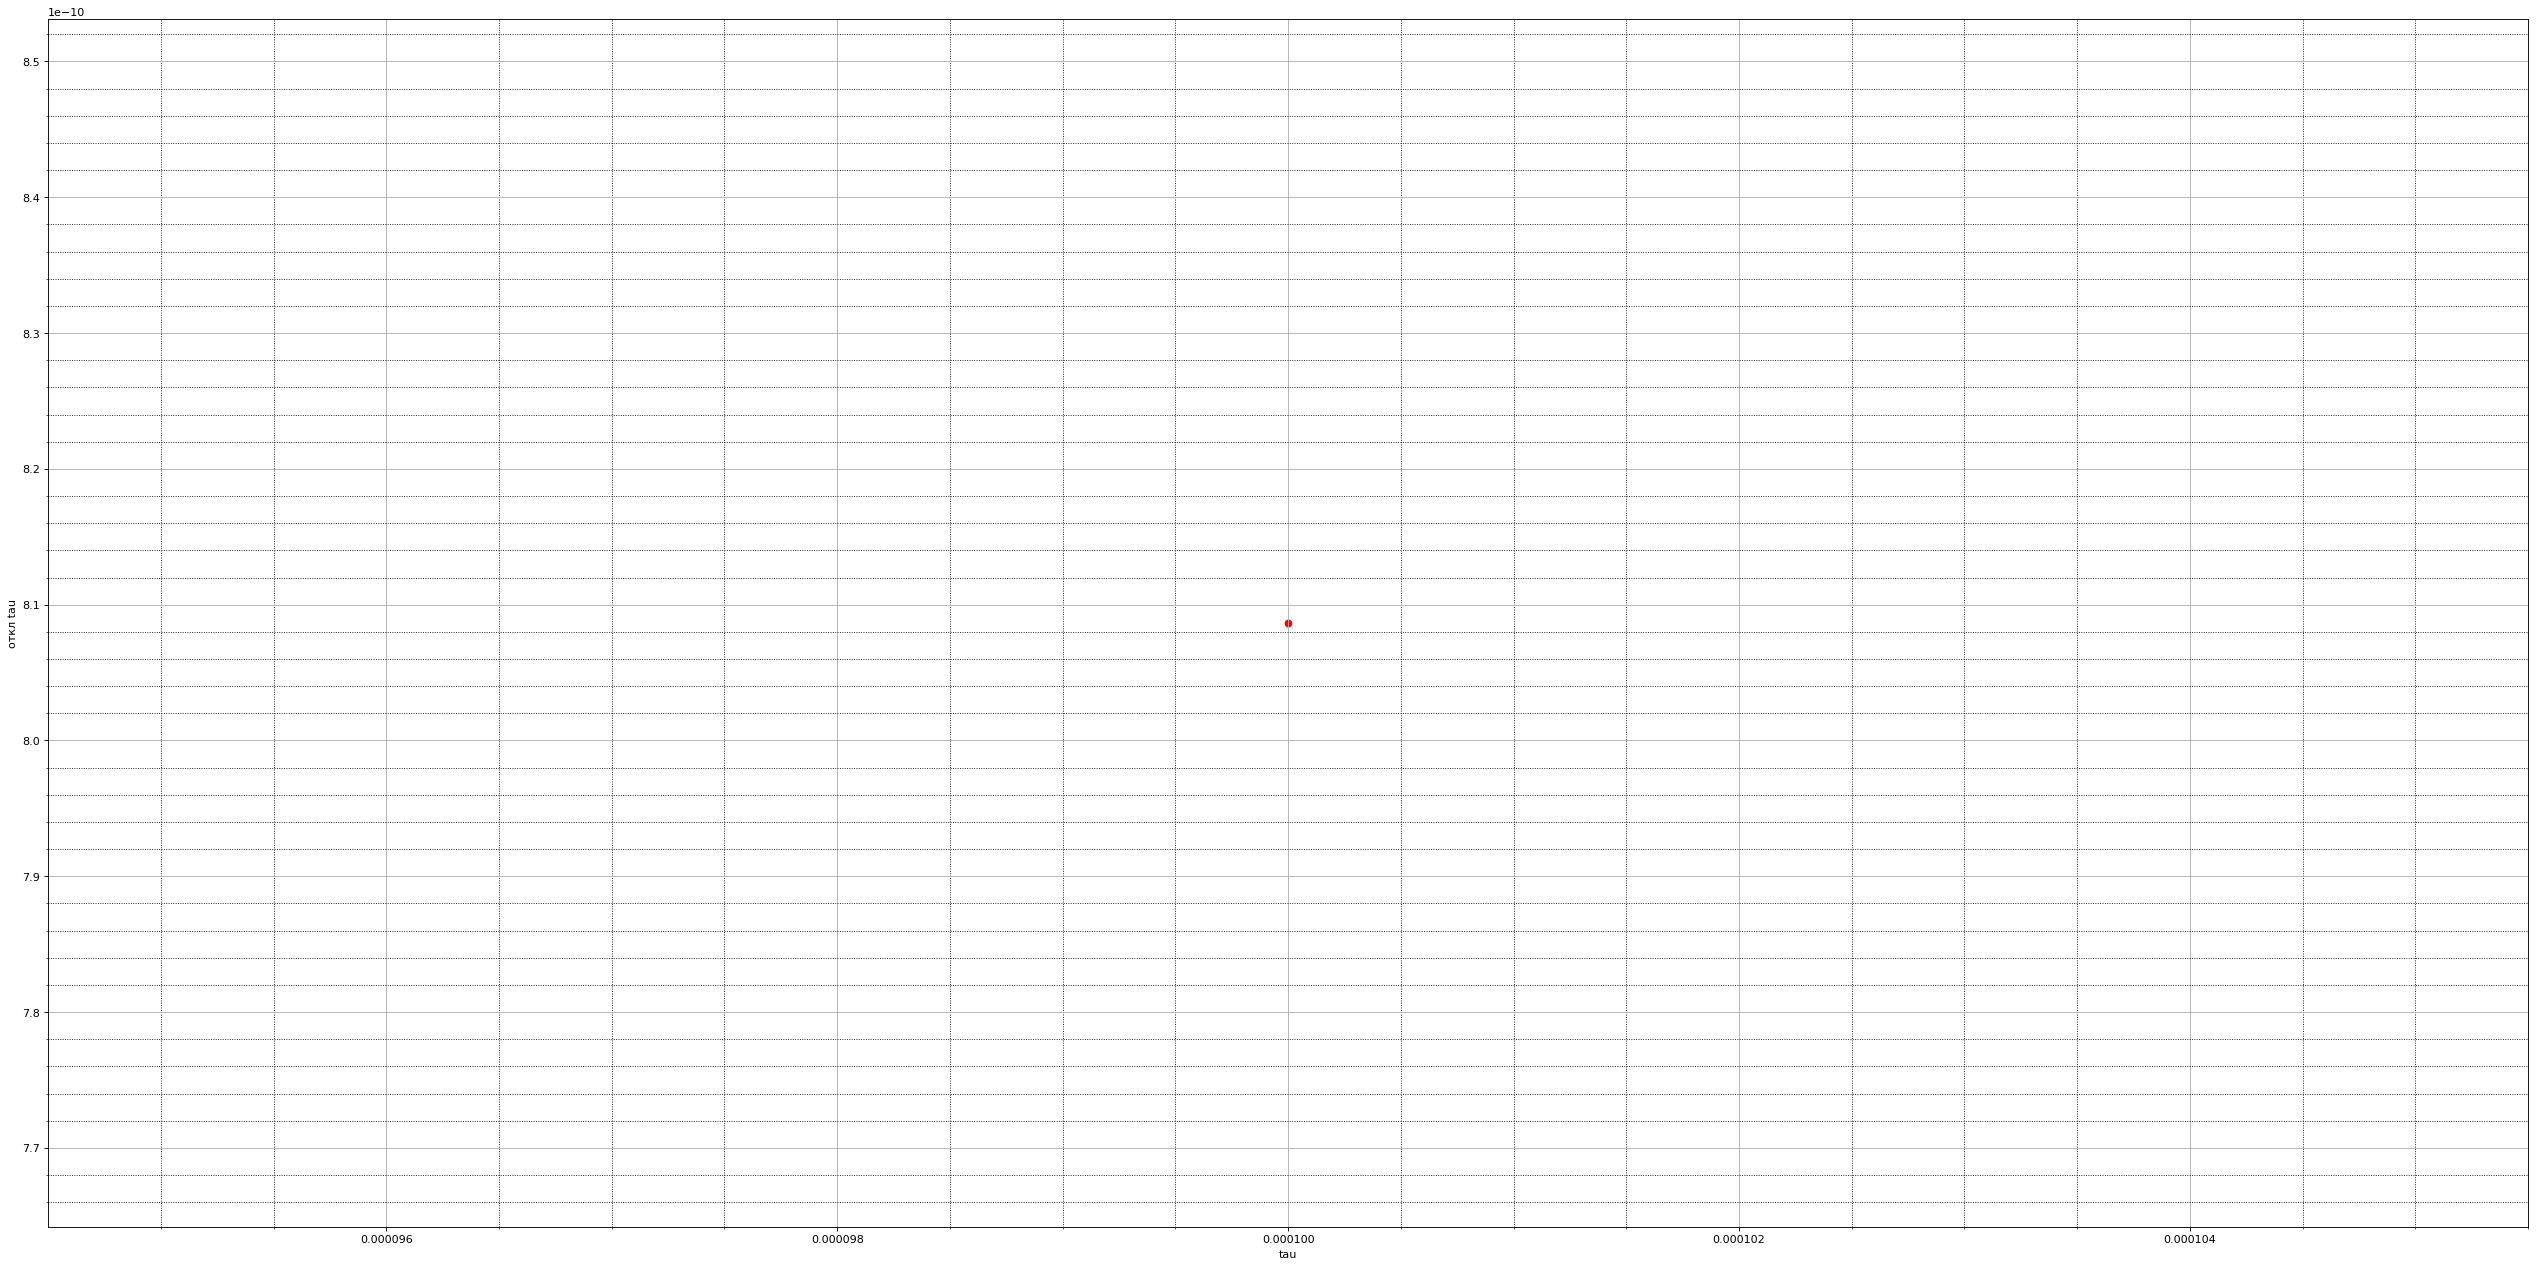

In [37]:
fig=plt.figure(figsize=(40, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel("tau") 
plt.ylabel("откл tau")
plt.grid()
plt.minorticks_on()
print(TAU,SR_PC,SR_EK)
plt.grid(which='minor',color = 'black', linestyle = ':')
plt.scatter(TAU,SR_PC,color = 'r') #predictor-corrector
#plt.plot(TAU,SR_EK,color='b') #Эйлера-Кромера



[1.0000000000000002e-10, 1e-12, 1e-08] [8.046200858369268e-12, 8.060392631126234e-14, 8.086667360046595e-10] [5.710365606316839e-06]


"\nTAU=np.array(TAU)\nSR_PC=np.array(SR_PC)\nA = np.vstack([TAU, np.ones(len(TAU))]).T\na, b = np.linalg.lstsq(A, SR_PC,rcond=None)[0]\nplt.plot(TAU, a*TAU + b, 'b')\n\nprint('alpha={}'.format(a))\n"

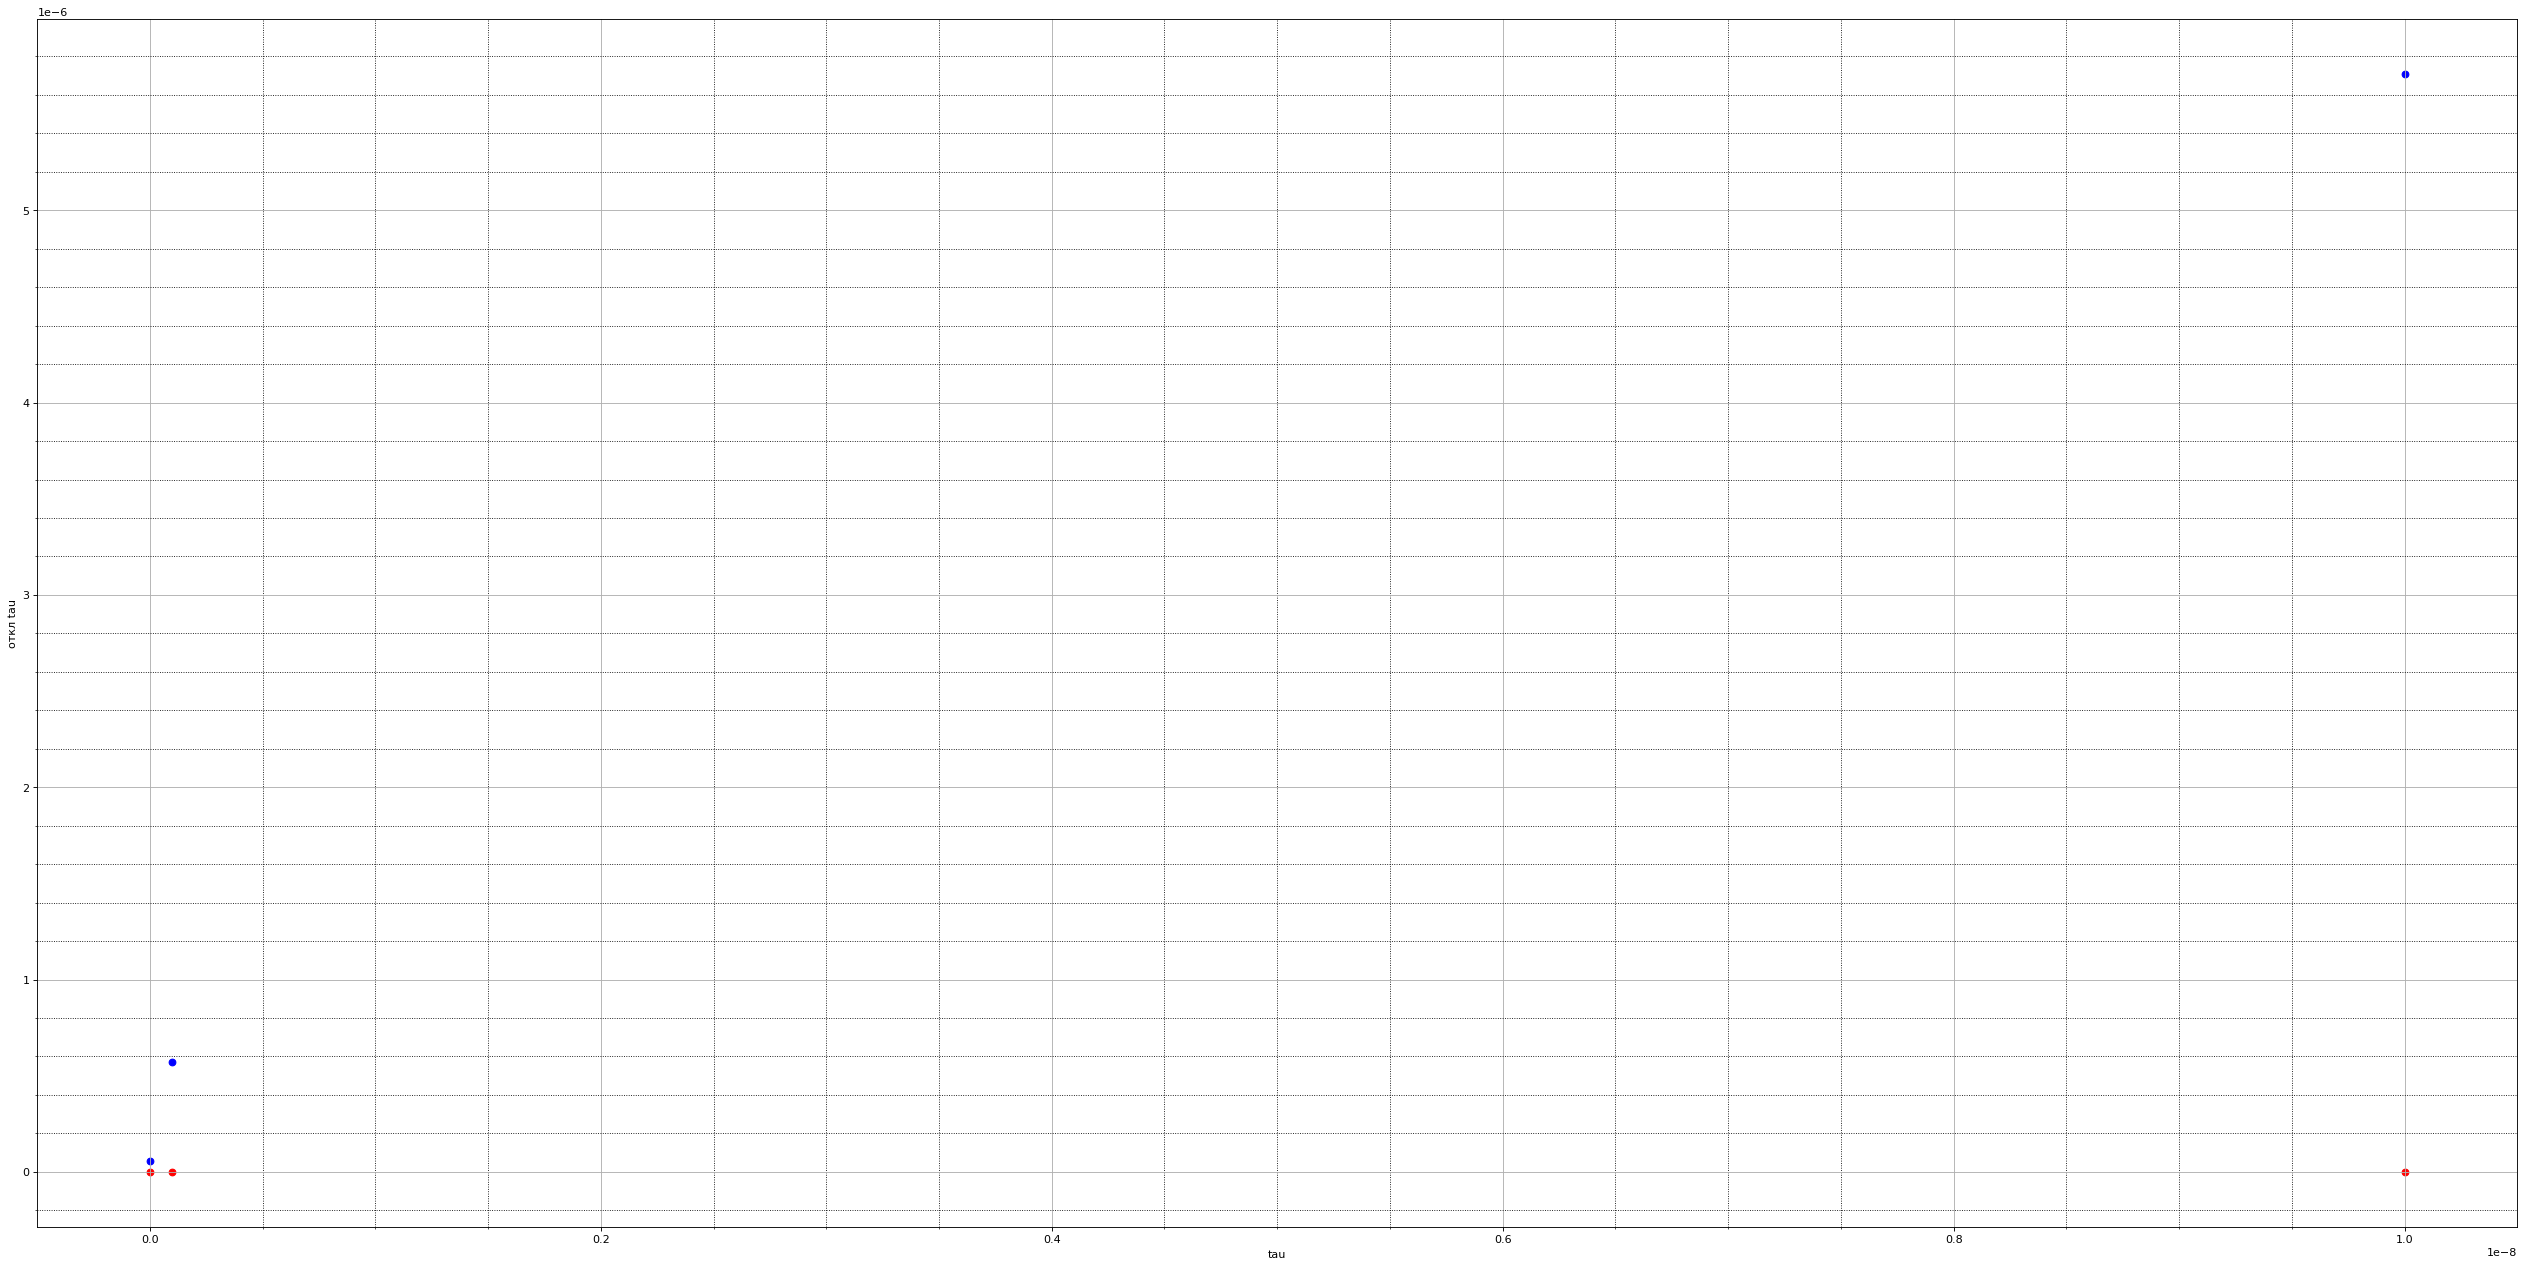

In [38]:
import math
import decimal
import numpy as np

TAU_0=[1e-05, 1e-06, 0.0001]
SR_PC_0 = [8.046200858369268e-12, 8.060392631126234e-14, 8.086667360046595e-10]
SR_EK_0 = [5.71036600300473e-07, 5.710366000194478e-08, 5.710365606316839e-06]

TAU = TAU_0
SR_PC = SR_PC_0
for i in range(len(TAU)):
    TAU[i] = TAU[i] * TAU[i]
fig=plt.figure(figsize=(40, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel("tau") 
plt.ylabel("откл tau")
plt.grid()
plt.minorticks_on()
plt.grid(which='minor',color = 'black', linestyle = ':')
plt.scatter(TAU_0,SR_PC_0,color = 'r') #predictor-corrector
plt.scatter(TAU_0,SR_EK_0,color='b') #Эйлера-Кромера
print(TAU,SR_PC,SR_EK)
'''
TAU=np.array(TAU)
SR_PC=np.array(SR_PC)
A = np.vstack([TAU, np.ones(len(TAU))]).T
a, b = np.linalg.lstsq(A, SR_PC,rcond=None)[0]
plt.plot(TAU, a*TAU + b, 'b')

print('alpha={}'.format(a))
'''

[1e-05, 1e-06, 1e-07, 0.0001] [8.046200858369268e-12, 8.060392631126234e-14, 2.1371793224034263e-15, 8.086667360046595e-10] [5.71036600300473e-07, 5.710366000194478e-08, 5.710367304012642e-09, 5.710365606316839e-06]


"\nTAU=np.array(TAU)\nSR_PC=np.array(SR_PC)\nA = np.vstack([TAU, np.ones(len(TAU))]).T\na, b = np.linalg.lstsq(A, SR_PC,rcond=None)[0]\nplt.plot(TAU, a*TAU + b, 'b')\n\nprint('alpha={}'.format(a))\n"

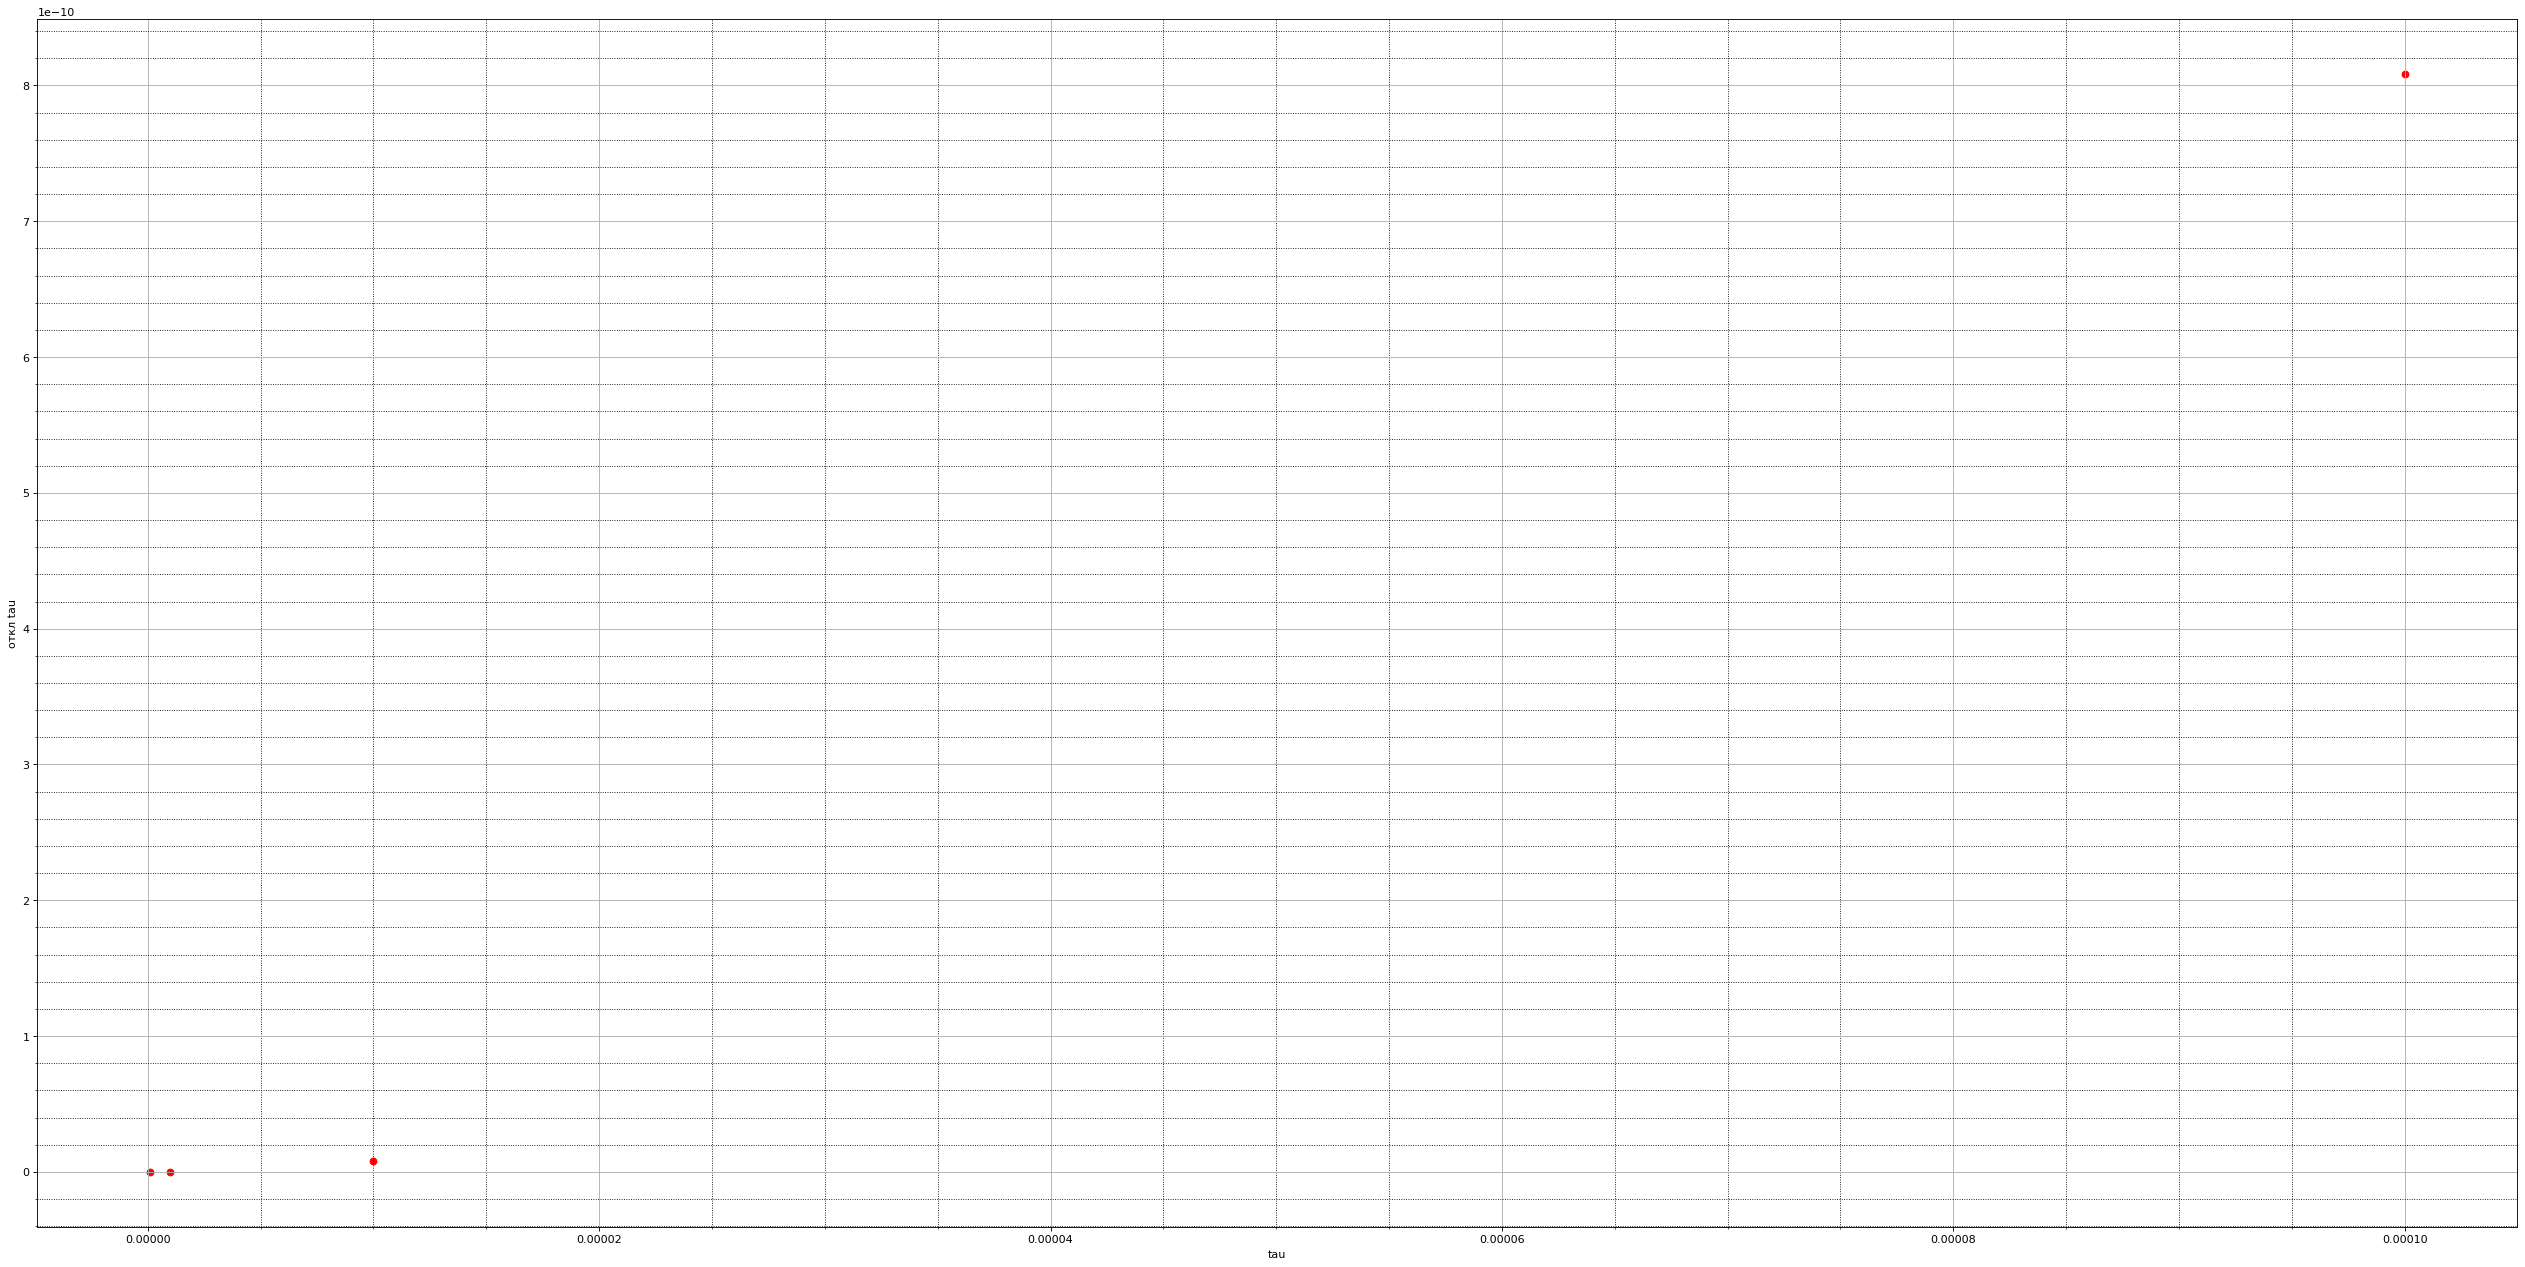

In [39]:
import math
import decimal
import numpy as np

TAU_0=[1e-05, 1e-06, 1e-07, 0.0001]
SR_PC_0 = [8.046200858369268e-12, 8.060392631126234e-14, 2.1371793224034263e-15, 8.086667360046595e-10]
SR_EK_0 = [5.71036600300473e-07, 5.710366000194478e-08, 5.710367304012642e-09, 5.710365606316839e-06]


TAU = TAU_0
SR_PC = SR_PC_0
SR_EK = SR_EK_0
#for i in range(len(TAU)):
#    TAU[i] = TAU[i] * TAU[i]
fig=plt.figure(figsize=(40, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel("tau") 
plt.ylabel("откл tau")
plt.grid()
plt.minorticks_on()
plt.grid(which='minor',color = 'black', linestyle = ':')
plt.scatter(TAU,SR_PC,color = 'r') #predictor-corrector
#plt.scatter(TAU,SR_EK,color='b') #Эйлера-Кромера
print(TAU,SR_PC,SR_EK)
'''
TAU=np.array(TAU)
SR_PC=np.array(SR_PC)
A = np.vstack([TAU, np.ones(len(TAU))]).T
a, b = np.linalg.lstsq(A, SR_PC,rcond=None)[0]
plt.plot(TAU, a*TAU + b, 'b')

print('alpha={}'.format(a))
'''

In [ ]:
TAU_0=[1e-05, 1e-06, 1e-07, 0.0001]
SR_PC_0 = [8.046200858369268e-12, 8.060392631126234e-14, 2.1371793224034263e-15, 8.086667360046595e-10]
SR_EK_0 = [5.71036600300473e-07, 5.710366000194478e-08, 5.710367304012642e-09, 5.710365606316839e-06]
